# **Notebook Pelatihan Model Proyek Sentimen Analisis**

- **Nama:** Fatikha Hudi Aryani
- **Email:** fatikhahudiaryani621@gmail.com
- **ID Dicoding:** fatikha_hudi_aryani

# **Import Library**

In [55]:
!pip install Sastrawi
!pip install nltk

In [56]:
# Import library untuk manipulasi data dan visualisasi
import pandas as pd  # Library untuk manipulasi data
import numpy as np  # Library untuk komputasi numerik
import matplotlib.pyplot as plt  # Library untuk membuat grafik
import seaborn as sns  # Library untuk visualisasi data yang lebih estetik

# Library untuk manipulasi tanggal dan waktu
import datetime as dt

# Library untuk manipulasi teks
import re  # Library untuk pencocokan pola teks menggunakan regular expressions
import string  # Library untuk manipulasi karakter string
import nltk

# Import library dari NLTK untuk pemrosesan bahasa alami
from nltk.tokenize import word_tokenize  # Untuk tokenisasi teks menjadi kata
from nltk.corpus import stopwords  # Untuk mendapatkan daftar kata-kata umum yang diabaikan (stopwords)
from nltk.stem import WordNetLemmatizer  # Untuk lemmatisasi (mengembalikan kata ke bentuk dasarnya)
from nltk import download as nltk_download  # Untuk mengunduh dataset NLTK

# Mengunduh data yang diperlukan untuk NLTK
nltk_download('punkt')  # Tokenizer bahasa Inggris
nltk_download('stopwords')  # Stopwords untuk bahasa Inggris
nltk_download('wordnet')  # Dataset untuk lemmatisasi
nltk_download('punktb_tab')  # Dataset for Punkt sentence tokenizer

# Import library dari Sastrawi untuk pemrosesan teks dalam bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Untuk stemming kata-kata dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Untuk menghapus stopwords bahasa Indonesia

# Library untuk membuat word cloud
from wordcloud import WordCloud  # Membuat representasi visual frekuensi kata

# Import library dari scikit-learn untuk machine learning
from sklearn.feature_extraction.text import TfidfVectorizer  # Untuk representasi teks dalam bentuk numerik menggunakan TF-IDF
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk membagi dataset dan melakukan pencarian parameter terbaik
from sklearn.naive_bayes import BernoulliNB  # Algoritma Naive Bayes dengan distribusi Bernoulli
from sklearn.metrics import accuracy_score, precision_score  # Metode untuk evaluasi performa model
from sklearn.preprocessing import LabelEncoder  # Untuk mengubah label kategori menjadi numerik

# Import library dari TensorFlow untuk deep learning
from tensorflow.keras.preprocessing.text import Tokenizer  # Untuk tokenisasi teks
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Untuk padding sequence agar memiliki panjang yang sama
from tensorflow.keras.models import Sequential  # Model sekuensial untuk deep learning
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D,
    Bidirectional, MaxPooling1D, Flatten, GRU, SimpleRNN
)  # Berbagai jenis layer untuk model deep learning
from tensorflow.keras.utils import to_categorical  # Untuk konversi label numerik menjadi one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping, Callback  # Callback untuk menghentikan pelatihan dini
from tensorflow.keras.regularizers import l2  # Regularisasi L2
from tensorflow.keras.optimizers import Adam  # Optimizer Adam

# Library untuk melakukan HTTP requests
import requests  # Untuk melakukan permintaan HTTP ke server

# Library untuk bekerja dengan file CSV
import csv  # Untuk membaca/menulis file CSV
from io import StringIO  # Untuk manipulasi string sebagai file

# Import TensorFlow untuk kebutuhan umum
import tensorflow as tf


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading punktb_tab: Package 'punktb_tab' not found
[nltk_data]     in index


In [57]:
%pip freeze > requirements.txt

# **Load Dataset**

In [58]:
# Read dataset dan menyimpannya ke dalam variabel df
df = pd.read_csv('tokopedia_reviews_30K.csv')

In [59]:
# Menampilkan 10 data teratas.
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,30bc2f12-72d1-46bd-9fd3-d7ae372fe687,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"saran untuk developer tokopedia., -pilihan alasan untuk membatalkan pesanan sebaiknya di tambahkan lagi pilihan yg lainnya, jadi pembeli bisa ketik alasan secara manual tergantung alasan kenapa di batalkan.jadi pembeli bisa langsung memberi masukan kpd penjual. jadi biar fair,karena banyak penjual yg kurang kooperatif,seperti bilang stok ada, ternyata setelah chekout pembayaran baru bilang kosong. mungkin dari pihak tokopedia bisa menegur semua penjual mengenai update stok yg real. trimakasih",5,572,3.305.0,2025-03-28 02:35:50,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-03-28 03:07:01,3.305.0
1,9e6f6bd1-e1e8-4de7-bbbd-bfa2154abfda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Pengirimannya lama, udah hampir 3 hari masih dikota sipengirim karna discount gratis ongkir barangnya ga diprioritaskan untuk dikirim, padahal pake yang J&T Express, mungkin kalo dibandingkan dengan toko sebelah yang orange kelas pengiriman hemat tapi ga selambat ini sih 4 hari sampe klopun hemat.",5,203,3.305.0,2025-04-05 12:01:15,"Terima kasih sudah mempercayakan Tokopedia sebagai tempat bertransaksi online pilihan Toppers. Jika ada kritik/saran, atau kendala pada aplikasi Tokopedia, silakan hubungi Tokopedia Care melalui http://tokopedia.com/help ya. Yuk transaksi lagi karena semua Ada dan Bisa di Tokopedia!",2025-04-05 12:27:01,3.305.0
2,2e9791a6-c641-4273-b91a-17f5aadcb4bc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Masukan untuk team developer TOKOPEDIA , alangkah baiknya kalau dibuatkan rating bintang khusus untuk pengiriman,jadi bkn cuma toko yg pembeli bisa kasih rating tapi pengiriman/ ekspedisi jg bisa diberi rating bintang. Karna selama ini kalau ekspedisi yg selalu lewat estimasi pengiriman maka pembeli akan memberi rating jelek yg berimbas ke seller padahal kesalahan ada di kurir/ekspedisi. Mohon di pertimbangkan.",5,1374,3.301.1,2025-03-01 04:07:14,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-03-01 04:27:01,3.301.1
3,73c683be-2804-4dbd-99ff-09908f1bbff0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,yang saya suka dari Tokopedia skrng bayar bisa menggunakan e-wallet seperti dana jadi gak perlu ribet harus top up ke aplikasi lain. untuk kedepannya mungkin UI jangan terlalu diperberat seperti toko sebelah,5,67,3.305.0,2025-04-05 03:39:44,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-04-05 04:07:02,3.305.0
4,df940859-e7d4-4a50-a533-720331120214,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"keren toped 1 aplikasi dengan berbagai kemudahan belanja dan pembayaran, kalo bisa saya kasih saran tolong dong buat pelacakan pengiriman di kasih tau posisi yg tepat seperti dalam maps itu aja sih selebihnya oke",5,30,3.305.0,2025-04-06 12:31:07,"Hi Toppers, terima kasih untuk rat

In [60]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  19908 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          7523 non-null   object
 9   repliedAt             7523 non-null   object
 10  appVersion            19908 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


Berdasarkan hasil diatas, dalam proyek analisis sentimen ini akan menggunakan kolom content untuk digunakan dalam membangun pelatihan model yang mana dalam kolom tersebut berisi reviews atau ulasan pengguna aplikasi.

# **Data Preparation**

In [61]:
# Menghapus missing value pada kolom 'content'
clean_data = df.dropna(subset=['content'])

# Menghapus data duplikat
clean_data = clean_data.drop_duplicates()

In [62]:
# Menampilkan info dataset setelah dilakukan cleaning
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  19908 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          7523 non-null   object
 9   repliedAt             7523 non-null   object
 10  appVersion            19908 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


Berikut ini fungsi-fungsi untuk tahapan preprocessing text:
*   cleanText: fungsi untuk menghapus mentions, hastag, RT, link, dan numbers dari text.
*   caseFoldingText: fungsi untuk mengubah text menjadi lowercase.
*   tokenizingText: fungsi untuk memecah text menjadi list tokens.
*   filteringText: fungsi untuk menghapus stopwords dalam bahasa Indonesia ataupun Inggris.
*   stemmingText: fungsi untuk mengubah text menjadi bentuk dasar. Namun pada proyek ini tidak akan digunakan karena proses nya yang lama.
*   toSentence: fungsi untuk menggabungkan kembali text yang sebelumnya dipecah menjadi token.

In [63]:
# Mendefinisikan fungsi-fungsi untuk preprocessing text

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def caseFoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

Inisialisasi fungsi yang digunakan untuk mengubah slangwords menjadi bentuk baku.

In [64]:
# Mendefinisikan fungsi untuk mengubah slangwords menjadi bentuk baku

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [65]:
# Inisialisasi clean_df sebagai dataframe yang sudah dilakukan cleaning
clean_df = clean_data
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,30bc2f12-72d1-46bd-9fd3-d7ae372fe687,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"saran untuk developer tokopedia., -pilihan alasan untuk membatalkan pesanan sebaiknya di tambahkan lagi pilihan yg lainnya, jadi pembeli bisa ketik alasan secara manual tergantung alasan kenapa di batalkan.jadi pembeli bisa langsung memberi masukan kpd penjual. jadi biar fair,karena banyak penjual yg kurang kooperatif,seperti bilang stok ada, ternyata setelah chekout pembayaran baru bilang kosong. mungkin dari pihak tokopedia bisa menegur semua penjual mengenai update stok yg real. trimakasih",5,572,3.305.0,2025-03-28 02:35:50,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-03-28 03:07:01,3.305.0
1,9e6f6bd1-e1e8-4de7-bbbd-bfa2154abfda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Pengirimannya lama, udah hampir 3 hari masih dikota sipengirim karna discount gratis ongkir barangnya ga diprioritaskan untuk dikirim, padahal pake yang J&T Express, mungkin kalo dibandingkan dengan toko sebelah yang orange kelas pengiriman hemat tapi ga selambat ini sih 4 hari sampe klopun hemat.",5,203,3.305.0,2025-04-05 12:01:15,"Terima kasih sudah mempercayakan Tokopedia sebagai tempat bertransaksi online pilihan Toppers. Jika ada kritik/saran, atau kendala pada aplikasi Tokopedia, silakan hubungi Tokopedia Care melalui http://tokopedia.com/help ya. Yuk transaksi lagi karena semua Ada dan Bisa di Tokopedia!",2025-04-05 12:27:01,3.305.0
2,2e9791a6-c641-4273-b91a-17f5aadcb4bc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Masukan untuk team developer TOKOPEDIA , alangkah baiknya kalau dibuatkan rating bintang khusus untuk pengiriman,jadi bkn cuma toko yg pembeli bisa kasih rating tapi pengiriman/ ekspedisi jg bisa diberi rating bintang. Karna selama ini kalau ekspedisi yg selalu lewat estimasi pengiriman maka pembeli akan memberi rating jelek yg berimbas ke seller padahal kesalahan ada di kurir/ekspedisi. Mohon di pertimbangkan.",5,1374,3.301.1,2025-03-01 04:07:14,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-03-01 04:27:01,3.301.1
3,73c683be-2804-4dbd-99ff-09908f1bbff0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,yang saya suka dari Tokopedia skrng bayar bisa menggunakan e-wallet seperti dana jadi gak perlu ribet harus top up ke aplikasi lain. untuk kedepannya mungkin UI jangan terlalu diperberat seperti toko sebelah,5,67,3.305.0,2025-04-05 03:39:44,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-04-05 04:07:02,3.305.0
4,df940859-e7d4-4a50-a533-720331120214,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"keren toped 1 aplikasi dengan berbagai kemudahan belanja dan pembayaran, kalo bisa saya kasih saran tolong dong buat pelacakan pengiriman di kasih tau posisi yg tepat seperti dalam maps itu aja sih selebihnya oke",5,30,3.305.0,2025-04-06 12:31:07,"Hi Toppers, terima kasih untuk rat

In [66]:
# Menampilkan dataset yang susah dibersihkan
clean_df = clean_data
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,30bc2f12-72d1-46bd-9fd3-d7ae372fe687,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"saran untuk developer tokopedia., -pilihan alasan untuk membatalkan pesanan sebaiknya di tambahkan lagi pilihan yg lainnya, jadi pembeli bisa ketik alasan secara manual tergantung alasan kenapa di batalkan.jadi pembeli bisa langsung memberi masukan kpd penjual. jadi biar fair,karena banyak penjual yg kurang kooperatif,seperti bilang stok ada, ternyata setelah chekout pembayaran baru bilang kosong. mungkin dari pihak tokopedia bisa menegur semua penjual mengenai update stok yg real. trimakasih",5,572,3.305.0,2025-03-28 02:35:50,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-03-28 03:07:01,3.305.0
1,9e6f6bd1-e1e8-4de7-bbbd-bfa2154abfda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Pengirimannya lama, udah hampir 3 hari masih dikota sipengirim karna discount gratis ongkir barangnya ga diprioritaskan untuk dikirim, padahal pake yang J&T Express, mungkin kalo dibandingkan dengan toko sebelah yang orange kelas pengiriman hemat tapi ga selambat ini sih 4 hari sampe klopun hemat.",5,203,3.305.0,2025-04-05 12:01:15,"Terima kasih sudah mempercayakan Tokopedia sebagai tempat bertransaksi online pilihan Toppers. Jika ada kritik/saran, atau kendala pada aplikasi Tokopedia, silakan hubungi Tokopedia Care melalui http://tokopedia.com/help ya. Yuk transaksi lagi karena semua Ada dan Bisa di Tokopedia!",2025-04-05 12:27:01,3.305.0
2,2e9791a6-c641-4273-b91a-17f5aadcb4bc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Masukan untuk team developer TOKOPEDIA , alangkah baiknya kalau dibuatkan rating bintang khusus untuk pengiriman,jadi bkn cuma toko yg pembeli bisa kasih rating tapi pengiriman/ ekspedisi jg bisa diberi rating bintang. Karna selama ini kalau ekspedisi yg selalu lewat estimasi pengiriman maka pembeli akan memberi rating jelek yg berimbas ke seller padahal kesalahan ada di kurir/ekspedisi. Mohon di pertimbangkan.",5,1374,3.301.1,2025-03-01 04:07:14,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-03-01 04:27:01,3.301.1
3,73c683be-2804-4dbd-99ff-09908f1bbff0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,yang saya suka dari Tokopedia skrng bayar bisa menggunakan e-wallet seperti dana jadi gak perlu ribet harus top up ke aplikasi lain. untuk kedepannya mungkin UI jangan terlalu diperberat seperti toko sebelah,5,67,3.305.0,2025-04-05 03:39:44,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-04-05 04:07:02,3.305.0
4,df940859-e7d4-4a50-a533-720331120214,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"keren toped 1 aplikasi dengan berbagai kemudahan belanja dan pembayaran, kalo bisa saya kasih saran tolong dong buat pelacakan pengiriman di kasih tau posisi yg tepat seperti dalam maps itu aja sih selebihnya oke",5,30,3.305.0,2025-04-06 12:31:07,"Hi Toppers, terima kasih untuk rat

Menerapkan preprocessing text pada dataset

In [67]:
!pip install nltk # Menginstall nltk
import nltk
nltk.download('punkt_tab') # Download punkt_tab

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [68]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleanText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_caseFoldingText'] = clean_df['text_clean'].apply(caseFoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_caseFoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [69]:
# Menampilkan dataset setelah dilakukan preprocessing text
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_caseFoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,30bc2f12-72d1-46bd-9fd3-d7ae372fe687,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"saran untuk developer tokopedia., -pilihan alasan untuk membatalkan pesanan sebaiknya di tambahkan lagi pilihan yg lainnya, jadi pembeli bisa ketik alasan secara manual tergantung alasan kenapa di batalkan.jadi pembeli bisa langsung memberi masukan kpd penjual. jadi biar fair,karena banyak penjual yg kurang kooperatif,seperti bilang stok ada, ternyata setelah chekout pembayaran baru bilang kosong. mungkin dari pihak tokopedia bisa menegur semua penjual mengenai update stok yg real. trimakasih",5,572,3.305.0,2025-03-28 02:35:50,"Toppers, terima kasih atas rating yang kamu berikan serta kepercayaan kamu dalam memilih Tokopedia sebagai tempat berbelanja online. Jika kamu punya kritik/saran, atau ada kendala pada aplikasi Tokopedia, silakan info melalui http://tokopedia.com/help",2025-03-28 03:07:01,3.305.0,saran untuk developer tokopedia pilihan alasan untuk membatalkan pesanan sebaiknya di tambahkan lagi pilihan yg lainnya jadi pembeli bisa ketik alasan secara manual tergantung alasan kenapa di batalkanjadi pembeli bisa langsung memberi masukan kpd penjual jadi biar fairkarena banyak penjual yg kurang kooperatifseperti bilang stok ada ternyata setelah chekout pembayaran baru bilang kosong mungkin dari pihak tokopedia bisa menegur semua penjual mengenai update stok yg real trimakasih,saran untuk developer tokopedia pilihan alasan untuk membatalkan pesanan sebaiknya di tambahkan lagi pilihan yg lainnya jadi pembeli bisa ketik alasan secara manual tergantung alasan kenapa di batalkanjadi pembeli bisa langsung memberi masukan kpd penjual jadi biar fairkarena banyak penjual yg kurang kooperatifseperti bilang stok ada ternyata setelah chekout pembayaran baru bilang kosong mungkin dari pihak tokopedia bisa menegur semua penjual mengenai update stok yg real trimakasih,saran untuk developer tokopedia pilihan alasan untuk membatalkan pesanan sebaiknya di tambahkan lagi pilihan yang lainnya jadi pembeli bisa ketik alasan secara manual tergantung alasan kenapa di batalkanjadi pembeli bisa langsung memberi masukan kepada penjual jadi biar fairkarena banyak penjual yang kurang kooperatifseperti bilang stok ada ternyata setelah chekout pembayaran baru bilang kosong mungkin dari pihak tokopedia bisa menegur semua penjual mengenai update stok yang real trimakasih,"[saran, untuk, developer, tokopedia, pilihan, alasan, untuk, membatalkan, pesanan, sebaiknya, di, tambahkan, lagi, pilihan, yang, lainnya, jadi, pembeli, bisa, ketik, alasan, secara, manual, tergantung, alasan, kenapa, di, batalkanjadi, pembeli, bisa, langsung, memberi, masukan, kepada, penjual, jadi, biar, fairkarena, banyak, penjual, yang, kurang, kooperatifseperti, bilang, stok, ada, ternyata, setelah, chekout, pembayaran, baru, bilang, kosong, mungkin, dari, pihak, tokopedia, bisa, menegur, semua, penjual, mengenai, update, stok, yang, real, trimakasih]","[saran, developer, tokopedia, pilihan, alasan, membatalkan, pesanan, tambahkan, pilihan, pembeli, ketik, alasan, manual, tergantung, alasan, batalkanjadi, pembeli, langsung, masukan, penjual, biar, fairkarena, penjual, kooperatifseperti, bilang, stok, chekout, pembayaran, bilang, kosong, tokopedia, menegur, penjual, update, stok, real, trimakasih]",saran developer tokopedia pilihan alasan membatalkan pesanan tambahkan pilihan pembeli ketik alasan manual tergantung alasan batalkanjadi pembeli langsung masukan penjual biar fairkarena penjual kooperatifseperti bilang stok chekout pembayaran bilang kosong tokopedia menegur penjual update stok real trimakasih
1,9e6f6bd1-e1e8-4de7-bbbd-bfa2154abfda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2

In [70]:
# Memuat positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_positive[row[0]] = int(row[1])


# Memuat negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [71]:
# Fungsi untuk menentukan polaritas sentimen

def sentiment_analysis_lexicon(text):
    score = 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score <= -7):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

# **Labelled Data**

In [72]:
# Memberi label pada text untuk menghitung polaritas
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    23304
neutral      4800
negative     1896
Name: count, dtype: int64


# **Data Understanding**

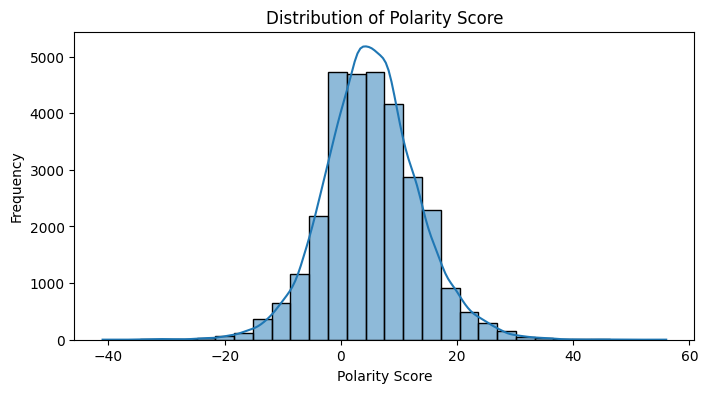

In [73]:
# Menampilkan distribusi polarity_score dengan histogram guna mempermudah visualisasi pembagian dataset
plt.figure(figsize=(8, 4))
sns.histplot(clean_df['polarity_score'], bins=30, kde=True)
plt.title('Distribution of Polarity Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

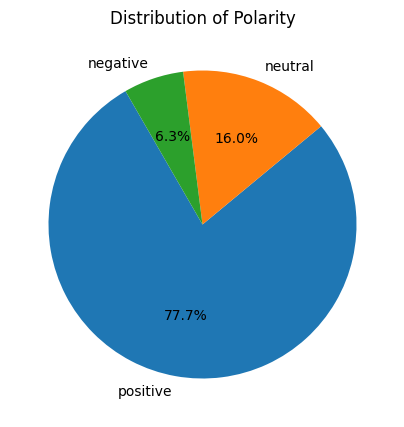

In [74]:
# Hitung jumlah masing-masing kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(5, 5))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Polarity')
plt.show()

# **Word Cloud**

*   Word Cloud secara Umum


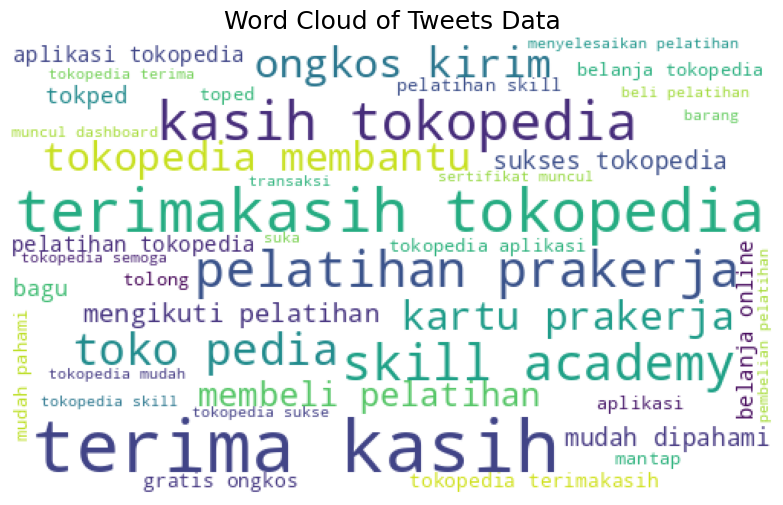

In [75]:
# Membuat wordcloud secara umum dari dataset tanpa melihat label

list_words = ''

for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=500, height=300, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

*   Word Cloud untuk Label Positif

In [76]:
# Membuat dataframe untuk wordcloud positive
pd.set_option('display.max_colwidth', 3000)

positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

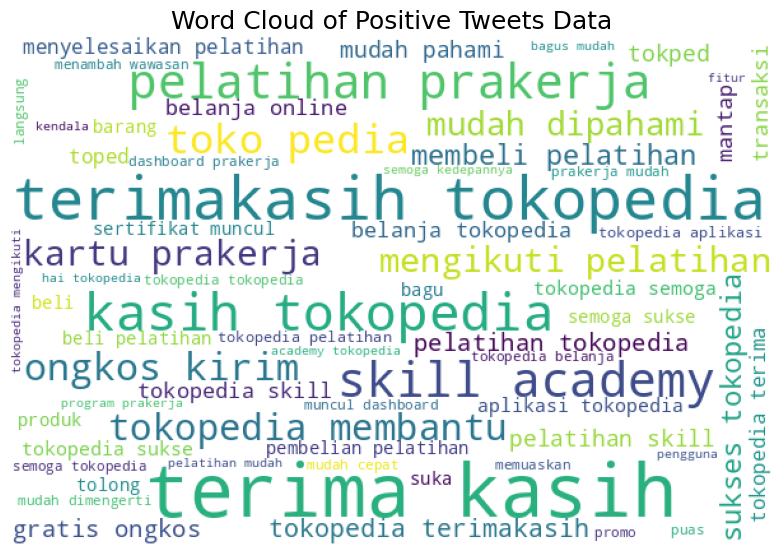

In [77]:
# Menampilkan wordcloud untuk label positive
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

*   Word Cloud untuk label Negatif

In [78]:
# Membuat dataframe untuk wordcloud negative
pd.set_option('display.max_colwidth', 3000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

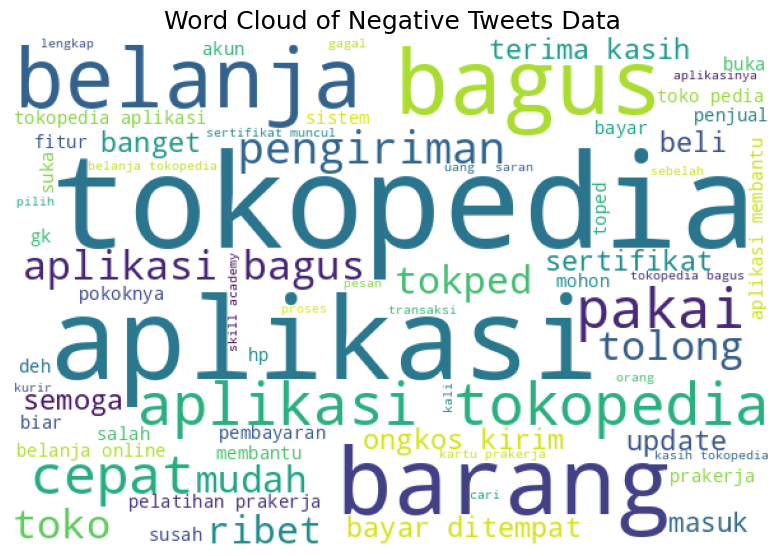

In [79]:
# Menampilkan wordcloud untuk label negative
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

*   Word Cloud untuk Label Netral

In [80]:
# Membuat dataframe untuk wordcloud neutral
pd.set_option('display.max_colwidth', 3000)

neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

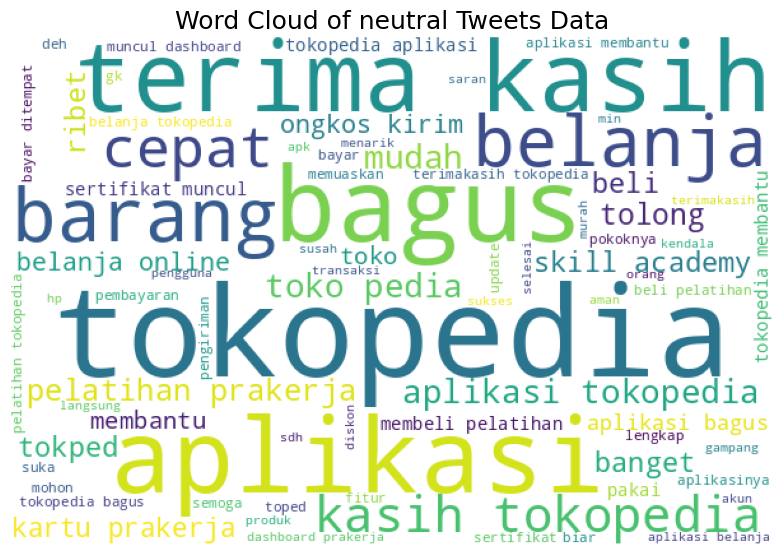

In [81]:
# Menampilkan wordcloud untuk label neutral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

# **Visualisasi Data**

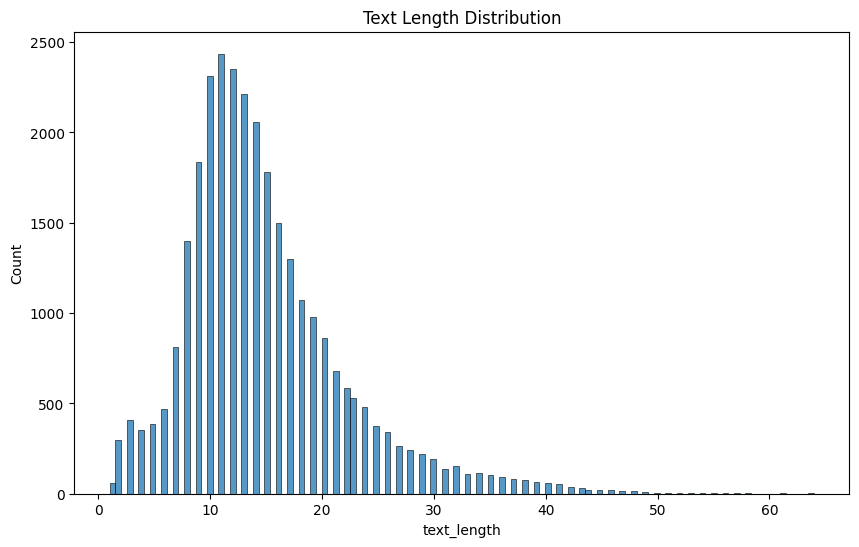

In [82]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Visualisasi text untuk length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

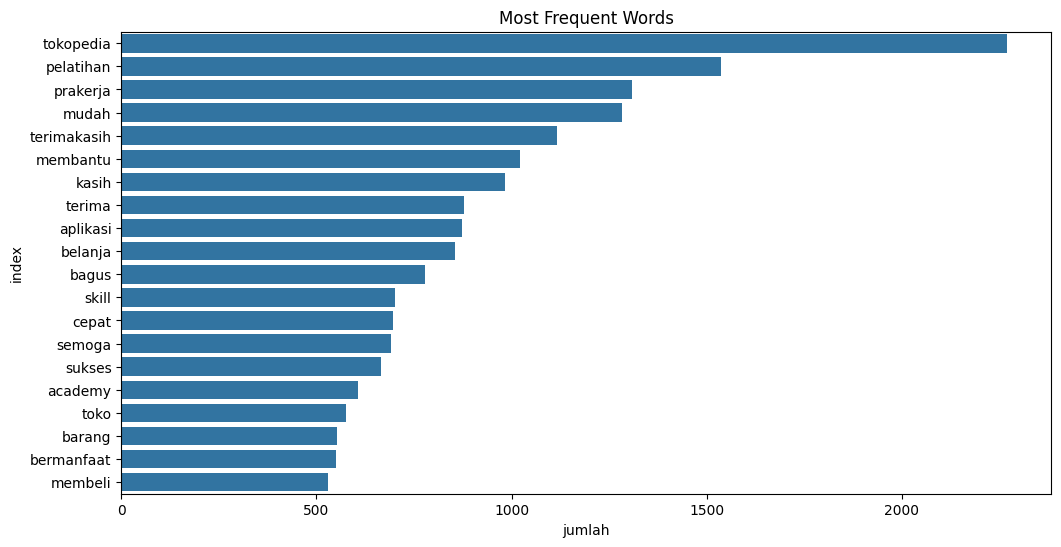

In [84]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf = df_tfidf.sum().reset_index(name='jumlah')
df_tfidf = df_tfidf.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=df_tfidf)
plt.title('Most Frequent Words')
plt.show()

# **Pemodelan**

Tahap Pemodelan ini dilakukan dengan menggunakan tiga percobaan dengan algoritma pelatihan yang berbeda. Selain itu, dibedakan dengan variasi dari dua kombinasi yaitu algoritma pelatihan serta pembagian data dari tiap model seperti berikut:

- Model 1
  - Algoritma Pelatihan: Long Short Term Memory (LSTM)
  - Pembagian Data: Training 70, validation 20, test 10
- Model 2
  - Algoritma Pelatihan: Convolutional Neural Network (CNN)
  - Pembagian Data: Training 80, validation 10, test 10
- Model 3
  - Algoritma Pelatihan: Gated Recurrent Units (GRU)
  - Pembagian Data: Training 90, validation 5, test 5

In [85]:
# Mengambil kolom text_akhir (yang dijadikan fitur) dan polarity (dijadikan target)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [86]:
# Tokenisasi
max_features = 2500
tokenisasi = Tokenizer(num_words=max_features, split=' ')
tokenisasi.fit_on_texts(X.values)
X = tokenisasi.texts_to_sequences(X.values)
X = pad_sequences(X)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

In [87]:
# Mendefinisikan callbacks yang akan berhenti apabila nilai akurasi training > 0.95
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.92:
            print(f"\nVal accuracy telah melebihi 0.92, menghentikan pelatihan pada epoch {epoch+1}")
            self.model.stop_training = True
early_stopping = CustomCallback()

**Model 1 - Long Short Term Memory (LSTM)**

**Membagi data menjadi 3 subset yaitu train (70%), validation (20%), dan test (10%). Pembagian data dilakukan dengan stratifikasi menggunakan random_state=42**

In [88]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [89]:
# Membangun model LSTM
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 2056
history_LSTM = model_LSTM.fit(X_train_LSTM, y_train_LSTM, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_LSTM, y_val_LSTM))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


11/11 - 72s - 7s/step - accuracy: 0.7317 - loss: 5.2899 - val_accuracy: 0.7793 - val_loss: 4.3131
Epoch 2/50
11/11 - 66s - 6s/step - accuracy: 0.7740 - loss: 3.8124 - val_accuracy: 0.7793 - val_loss: 3.1643
Epoch 3/50
11/11 - 68s - 6s/step - accuracy: 0.7740 - loss: 2.8098 - val_accuracy: 0.7793 - val_loss: 2.3429
Epoch 4/50
11/11 - 91s - 8s/step - accuracy: 0.7740 - loss: 2.0941 - val_accuracy: 0.7793 - val_loss: 1.7540
Epoch 5/50
11/11 - 77s - 7s/step - accuracy: 0.7740 - loss: 1.5746 - val_accuracy: 0.7793 - val_loss: 1.3139
Epoch 6/50
11/11 - 76s - 7s/step - accuracy: 0.7794 - loss: 1.1768 - val_accuracy: 0.7952 - val_loss: 0.9928
Epoch 7/50
11/11 - 51s - 5s/step - accuracy: 0.8035 - loss: 0.8926 - val_accuracy: 0.8218 - val_loss: 0.7560
Epoch 8/50
11/11 - 83s - 8s/step - accuracy: 0.8369 - loss: 0.6764 - val_accuracy: 0.8580 - val_loss: 0.5804
Epoch 9/50
11/11 - 86s - 8s/step - accuracy: 0.8692 - loss: 0.5211 - val_accuracy: 0.8698 - val_loss: 0.4816
Epoch 10/50
11/11 - 78s - 7s/s

**Hasil evaluasi akan menampilkan test score dan test accuracy**
- Test Score : nilai loss pada data test
- Test Accuracy : akurasi odel pada data test
- Semakin rendah nilai test score dan semakin tinggi accuracy, maka semakin baik performa model

In [90]:
# Evaluasi model
score_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
print("Test score: %.2f" % (score_LSTM))
print("Test accuracy: %.2f" % (acc_LSTM))

94/94 - 3s - 36ms/step - accuracy: 0.9353 - loss: 0.2180
Test score: 0.22
Test accuracy: 0.94


Hasil dari evaluasi model Long Short Term Memory (LSTM) menunjukkan bahwa pengujian menghasilkan nilai test score sebesar 0.22 dan nilai akurasi yang tinggi yaitu sebesar 0.94. Ini berarti model memiliki akurasi 94% pada data test dengan loss 0.22 dan menunjukkan performa model Long Short Term Memory (LSTM) bagus.

In [91]:
model_LSTM.save('model_LSTM.h5')

**Model 2 - CNN (Convlutional Neural Network)**

**Membagi data menjadi 3 subset yaitu train (80%), validation (10%), dan test (10%). Pembagian data dilakukan dengan stratifikasi menggunakan random_state=42**

In [92]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_CNN, y_train_val, y_test_CNN = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

In [93]:
# Membangun model CNN
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_CNN.add(Conv1D(64, kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 2056
history_CNN = model_CNN.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_CNN, y_val_CNN))

Epoch 1/50
12/12 - 39s - 3s/step - accuracy: 0.7357 - loss: 0.7651 - val_accuracy: 0.7933 - val_loss: 0.6065
Epoch 2/50
12/12 - 41s - 3s/step - accuracy: 0.7729 - loss: 0.6332 - val_accuracy: 0.7933 - val_loss: 0.5181
Epoch 3/50
12/12 - 41s - 3s/step - accuracy: 0.7733 - loss: 0.5033 - val_accuracy: 0.7987 - val_loss: 0.4089
Epoch 4/50
12/12 - 41s - 3s/step - accuracy: 0.8127 - loss: 0.3942 - val_accuracy: 0.8577 - val_loss: 0.3378
Epoch 5/50
12/12 - 35s - 3s/step - accuracy: 0.8539 - loss: 0.3138 - val_accuracy: 0.8927 - val_loss: 0.2771
Epoch 6/50
12/12 - 42s - 3s/step - accuracy: 0.8903 - loss: 0.2511 - val_accuracy: 0.9087 - val_loss: 0.2392
Epoch 7/50
12/12 - 76s - 6s/step - accuracy: 0.9176 - loss: 0.2024 - val_accuracy: 0.9193 - val_loss: 0.2197
Epoch 8/50
12/12 - 41s - 3s/step - accuracy: 0.9370 - loss: 0.1669 - val_accuracy: 0.9157 - val_loss: 0.2116
Epoch 9/50

Val accuracy telah melebihi 0.92, menghentikan pelatihan pada epoch 9
12/12 - 42s - 3s/step - accuracy: 0.9495 - los

**Hasil evaluasi akan menampilkan test score dan test accuracy**
- Test Score : nilai loss pada data test
- Test Accuracy : akurasi model pada data test
- Semakin rendah nilai test score dan semakin tinggi accuracy, maka semakin baik performa model

In [94]:
# Evaluasi model
score_CNN, acc_CNN = model_CNN.evaluate(X_test_CNN, y_test_CNN, verbose=2,batch_size=1028)
print("Test score: %.2f" % (score_CNN))
print("Test accuracy: %.2f" % (acc_CNN))

3/3 - 2s - 652ms/step - accuracy: 0.9300 - loss: 0.1890
Test score: 0.19
Test accuracy: 0.93


Hasil dari evaluasi model Convolutional Neural Network (CNN) menunjukkan bahwa pengujian menghasilkan nilai test score sebesar 0.19 dan nilai akurasi yang tinggi yaitu sebesar 0.93. Ini berarti model memiliki akurasi 93% pada data test dengan loss 0.19 dan menunjukkan performa model Convolutional Neural Network (CNN) bagus.

In [95]:
model_CNN.save('model_CNN.h5')

**Model 3 - Gated Recurrent Units (GRU)**

**Membagi data menjadi 3 subset yaitu train (90%), validation (5%), dan test (5%). Pembagian data dilakukan dengan stratifikasi menggunakan random_state=42**

In [96]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=0.0526, random_state=42)

In [97]:
# Membangun model GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_GRU.add(SpatialDropout1D(0.3))
model_GRU.add(Bidirectional(GRU(64, return_sequences=True)))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False)))
model_GRU.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(num_classes, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 1028
history_GRU = model_GRU.fit(X_train_GRU, y_train_GRU, epochs=20, batch_size=batch_size, verbose=2, validation_data=(X_val_GRU, y_val_GRU),callbacks=[early_stopping])

Epoch 1/20
27/27 - 157s - 6s/step - accuracy: 0.7284 - loss: 2.7731 - val_accuracy: 0.7847 - val_loss: 2.0047
Epoch 2/20
27/27 - 130s - 5s/step - accuracy: 0.8148 - loss: 1.6012 - val_accuracy: 0.8680 - val_loss: 1.1682
Epoch 3/20
27/27 - 131s - 5s/step - accuracy: 0.8811 - loss: 0.9325 - val_accuracy: 0.9040 - val_loss: 0.7308
Epoch 4/20

Val accuracy telah melebihi 0.92, menghentikan pelatihan pada epoch 4
27/27 - 157s - 6s/step - accuracy: 0.9246 - loss: 0.5728 - val_accuracy: 0.9200 - val_loss: 0.4970


**Hasil evaluasi akan menampilkan test score dan test accuracy**
- Test Score : nilai loss pada data test
- Test Accuracy : akurasi model pada data test
- Semakin rendah nilai test score dan semakin tinggi accuracy, maka semakin baik performa model

In [98]:
# Evaluasi model
score_GRU, acc_GRU = model_GRU.evaluate(X_test_GRU, y_test_GRU, verbose=2)
print("Test score: %.2f" % (score_GRU))
print("Test accuracy: %.2f" % (acc_GRU))

47/47 - 4s - 82ms/step - accuracy: 0.9300 - loss: 0.4669
Test score: 0.47
Test accuracy: 0.93


Hasil dari evaluasi model Gated Recurrent Units (GRU) menunjukkan bahwa pengujian menghasilkan nilai test score sebesar 0.47 dan nilai akurasi yang tinggi yaitu sebesar 0.93. Ini berarti model memiliki akurasi 93% pada data test dengan loss 0.47 dan menunjukkan performa model Gated Recurrent Units (GRU) bagus.

In [ ]:
# Menyimpan model
model_GRU.save('model_GRU.h5')

# **Evaluasi Model**

In [99]:
results_df = pd.DataFrame({
    'Model': ['LSTM', 'CNN', 'GRU'],
    'Accuracy Train': [history_LSTM.history['accuracy'][-1], history_CNN.history['accuracy'][-1],history_GRU.history['accuracy'][-1]],
    'Accuracy Test': [acc_LSTM, acc_CNN,acc_GRU]
})
results_df

,Model,Accuracy Train,Accuracy Test
0,LSTM,0.950619,0.935333
1,CNN,0.949500,0.930000
2,GRU,0.924630,0.930000


* Akurasi Training : nilai akurasi yang diambil dari epoch terakhir proses pelatihan
* Akurasi Testing : nilai akurasi hasil evaluasi pada data test

* Dari hasil evaluasi model diatas menunjukkan bahwa perbandingan performa ketiga model (LSTM, CNN, dan GRU) dengan menampilkan akurasi training dan akurasi testing yang besarnya sama-sama tinggi yaitu > 0.92.
* Hasil dataframe **result_df** digunakan untuk menganalisis dan membandingkan kinerja ketiga model secara sekaligus, baik dalam hal pembelajaran (training) maupun kemampuan generalisasi (testing).

# **Prediksi**

*   Prediksi dilakukan dengan menggunakan 3 model berbeda yaitu LSTM, CNN, GRU.
*   Untuk input data, terdapat 3 teks baru yang akan diprediksi sentimennya (positive, negative, neutral).
*   Preprocessing dengan mengubah teks baru menjadi sequence menggunakan tokenizer yang sama seperti saat pelatihan. Dan Sequence dipadding agar memiliki panjang yang sama dengan data training (X.shape[1]).


In [100]:
# Contoh data baru berupa teks
new_texts = [
    "pemakai tokopedia temukan penjual barang bagus penjual berkualitas original pakaian gadget sparepart sepeda motor sedih fitur kurir rekomendasi gratis ongkos kirim bikin paket layanan berbayar murah gratisan bagus dunia harap tokopedia bikin promo gimmick bikin customer pindah app miss tokopedia",
    "kurir sicepat ganti nama si lambat si lambat tokopedia bagus langganan pke aplikasi tokped bawa nama jelek kurir sicepat min tolong kasih peringatan sicepat nakal kurirnya ngirimnya lambaaaaattttt kali",
    "saran belanja kurir rekomendasi pengirimannya komplain alasannya follow perkembangansaran free ongkos kirim pakai salah kurir kurir kurir"
]

# Nilai asli dari teks
true_labels = ["positive", "negative", "neutral"]

# Tokenisasi teks baru
new_sequences = tokenisasi.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=X.shape[1])

# Membuat prediksi
predict_LSTM = model_LSTM.predict(new_padded_sequences)
predict_CNN = model_CNN.predict(new_padded_sequences)
predict_GRU = model_GRU.predict(new_padded_sequences)

# Mengubah prediksi menjadi label
predicted_labels_LSTM = np.argmax(predict_LSTM, axis=1)
predicted_labels_CNN = np.argmax(predict_CNN, axis=1)
predicted_labels_GRU = np.argmax(predict_GRU, axis=1)

predicted_labels_LSTM = labelencoder.inverse_transform(predicted_labels_LSTM)
predicted_labels_CNN = labelencoder.inverse_transform(predicted_labels_CNN)
predicted_labels_GRU = labelencoder.inverse_transform(predicted_labels_GRU)

# Menampilkan hasil prediksi
for text, true_label, label_LSTM, label_CNN, label_GRU in zip(new_texts, true_labels, predicted_labels_LSTM, predicted_labels_CNN, predicted_labels_GRU):
    print(f"Text: {text}\nTrue Label: {true_label}\nPredicted Label (LSTM): {label_LSTM}\nPredicted Label (CNN): {label_CNN}\nPredicted Label (GRU): {label_GRU}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
Text: pemakai tokopedia temukan penjual barang bagus penjual berkualitas original pakaian gadget sparepart sepeda motor sedih fitur kurir rekomendasi gratis ongkos kirim bikin paket layanan berbayar murah gratisan bagus dunia harap tokopedia bikin promo gimmick bikin customer pindah app miss tokopedia
True Label: positive
Predicted Label (LSTM): positive
Predicted Label (CNN): positive
Predicted Label (GRU): positive

Text: kurir sicepat ganti nama si lambat si lambat tokopedia bagus langganan pke aplikasi tokped bawa nama jelek kurir sicepat min tolong kasih peringatan sicepat nakal kurirnya ngirimnya lambaaaaattttt kali
True Label: negative
Predicted Label (LSTM): negative
Predicted Label (CNN): negative
Predicted Label (GRU): negative

Text: saran belanja kurir rekomendasi pengirimannya komplain alasannya follow perkembangansaran free ongkos kirim pakai salah kurir kurir kurir
True Label: neutral
Predicted Label (LSTM): neutral
Predicted Label 